In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


- Student 1 Name: Ans Imran
- Student 2 Name: Richard Awde
- Student 3 Name: Ahmad Hasan

# Ordinary differential equations training

## 1. First training, with  a simple equation


We want to solve the very simple equation :$\frac{dx}{dt}=-kx$, with $x(t=0)=x_0$ as an initial boundary condition.
1) Solve the equation anlaytically and write the solution below x(t)=

## Some Modifications
This is the differential equation of a simple harmonic oscillator. We know that for a simple harmonic oscillator,

$$ F  = - k x   \implies   ma = -kx   \implies    m \frac{dx^{2}}{dt^{2}} = - k x $$

$$ \implies  \frac{dx^{2}}{dt^{2}}  =  \frac{-k}{m} x $$

### This is a 2nd order ordinary differential equation, it's general solution is simply,

$$x(t) =  c_{1} Cos \sqrt{ \frac{k}{m}  } t + c_{2} Sin \sqrt{ \frac{k}{m}  } t $$

When 
$x_{0}$  = 1 (initial displacement)

& 

$x'_{0}$ = 0 (initial velocity) 

then, the solution becomes,
$$  x(t) = 1 . Cos \sqrt{ \frac{k}{m}  } t $$

# To what physical process it would correspond ? What is the dimension of $1/k$ assuming that $t$ is a time ?

#### we have already discussed that it corresponds to a simple harmonic motion

From 
$$ F = - kx  \implies   ma = -kx  \implies    [kg] [L] [S]^{-2} = k [L]  $$

#### Therefore, the units of k are:
$$ k = [kg] [S]^{-2} $$

#### Therefore, the units of $\frac{1}{k}$ are:
$$ k = [kg]^{-1} [S]^{2} $$



# In the following we call $f(x,t)$ the derivative $\frac{dx}{dt}=-kx $, so that the system we want to solve can be simply written $\frac{dx}{dt}=f(x,t)$

#### 1.1 Euler solver

Build a function called $deriv(x,t)$ that returns f(x,t). k will be declared as a global variables, defined outside the function $deriv(x,t)$. You can use the following template. Print f for x0=1, t=10., k=1.

In [6]:
def deriv(x,t):
    global k
    f = -k*x
    return f


k  = 1
x0 = 1
t  = 10
print(deriv( x0 , t ))


-1


# Build a simple Euler solver: define dt, and write an iterative procedure that at each time step 
* 1) compute f(x,t)
* 2) increment x according to the Euler scheme : x(t+dt)=x(t)+dt*f(x,t)
* 3) keep in memory the new value of x(t)
* 3) time=time+dt

Of course, before that you must initialize time=0 and x(t=0)=1 


# plot the result for dt=0.1 and for time going from 0 to t=5

#### The full equation is:

$$ \frac{dx^{2}}{dt^{2}}  =  \frac{-k}{m} x $$

$$ \implies x''(t) = \frac{-k}{m} x = f(x,t)$$

let

$$ \frac{dx}{dt} = v  $$

$$\implies  \frac{dx^{2}}{dt^{2}} = \frac{dv}{dt} = f(t,x,v) = \frac{-k}{m} x$$

let's call 

x the position

&

v the velocity

In the following cell we'll solve the set of these two coupled first order differential equations, for position and velocity.

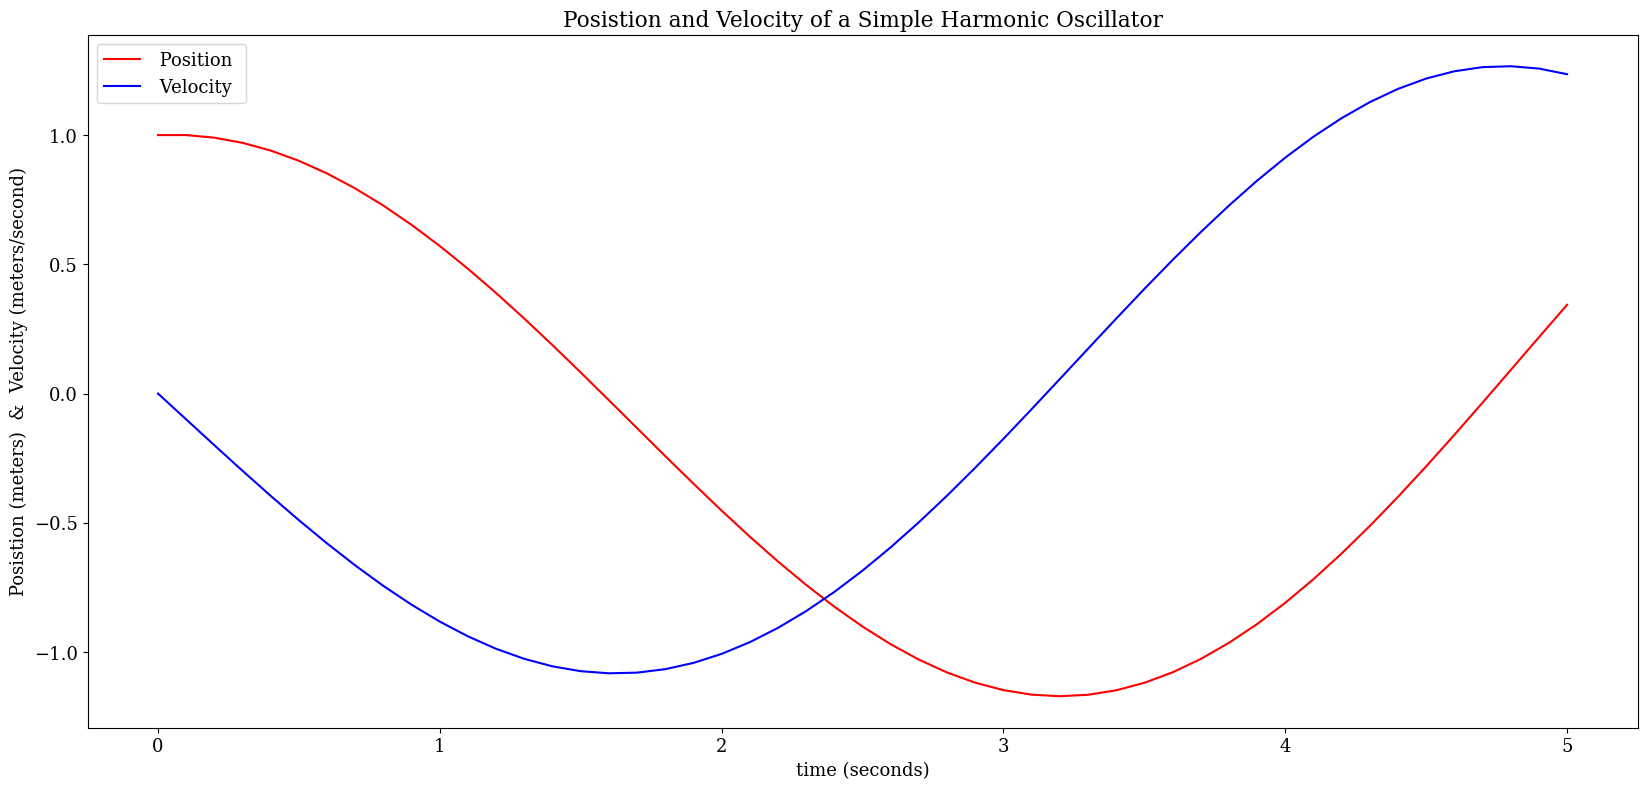

In [7]:
import matplotlib
import matplotlib.pyplot as plt

# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 13, 'font.family': 'serif'})



def euler_solver(time_initial, time_final, step_size, x_initial, v_initial,function):
    ''' 
    Euler Solver for a 2nd order differential equation
    (D.E by D.G Zill 10th edition)
    '''
    time_array = np.arange(time_initial, time_final, step_size, dtype = float)
    x = np.array([])
    x = np.append(x,x_initial)
    
    v = np.array([])
    v = np.append(v,v_initial)
    
    
    for i in range( len(time_array) - 1 ):

        x_i_plus_1 = x[i] + dt*v[i]
        x          = np.append(x,x_i_plus_1)
        
        v_i_plus_1 = v[i] + dt*function( x[i] , time_array[i] )
        v          = np.append(v,v_i_plus_1)
    
    return x, v


dt  = 0.1
t0  = 0
tf  = 5 + dt
X0  = 1
v0  = 0        # using initial velocity = zero



result_x, result_v = euler_solver(t0, tf, dt, x0, v0, deriv)



plt.figure(figsize=(20,9))
plt.plot(np.arange(t0, tf, dt), result_x, 'r',label=" Position ")
plt.plot(np.arange(t0, tf, dt), result_v, 'b',label=" Velocity ")
plt.legend(loc = 2)
plt.xlabel('time (seconds)')
plt.ylabel('Posistion (meters)  &  Velocity (meters/second)')
plt.title("Posistion and Velocity of a Simple Harmonic Oscillator")
plt.show()


Plot the difference between the numeric solution and the anlytical solution. Do you have comments ?

The mean value of error for simple Euler Method is: 0.07677391949718335


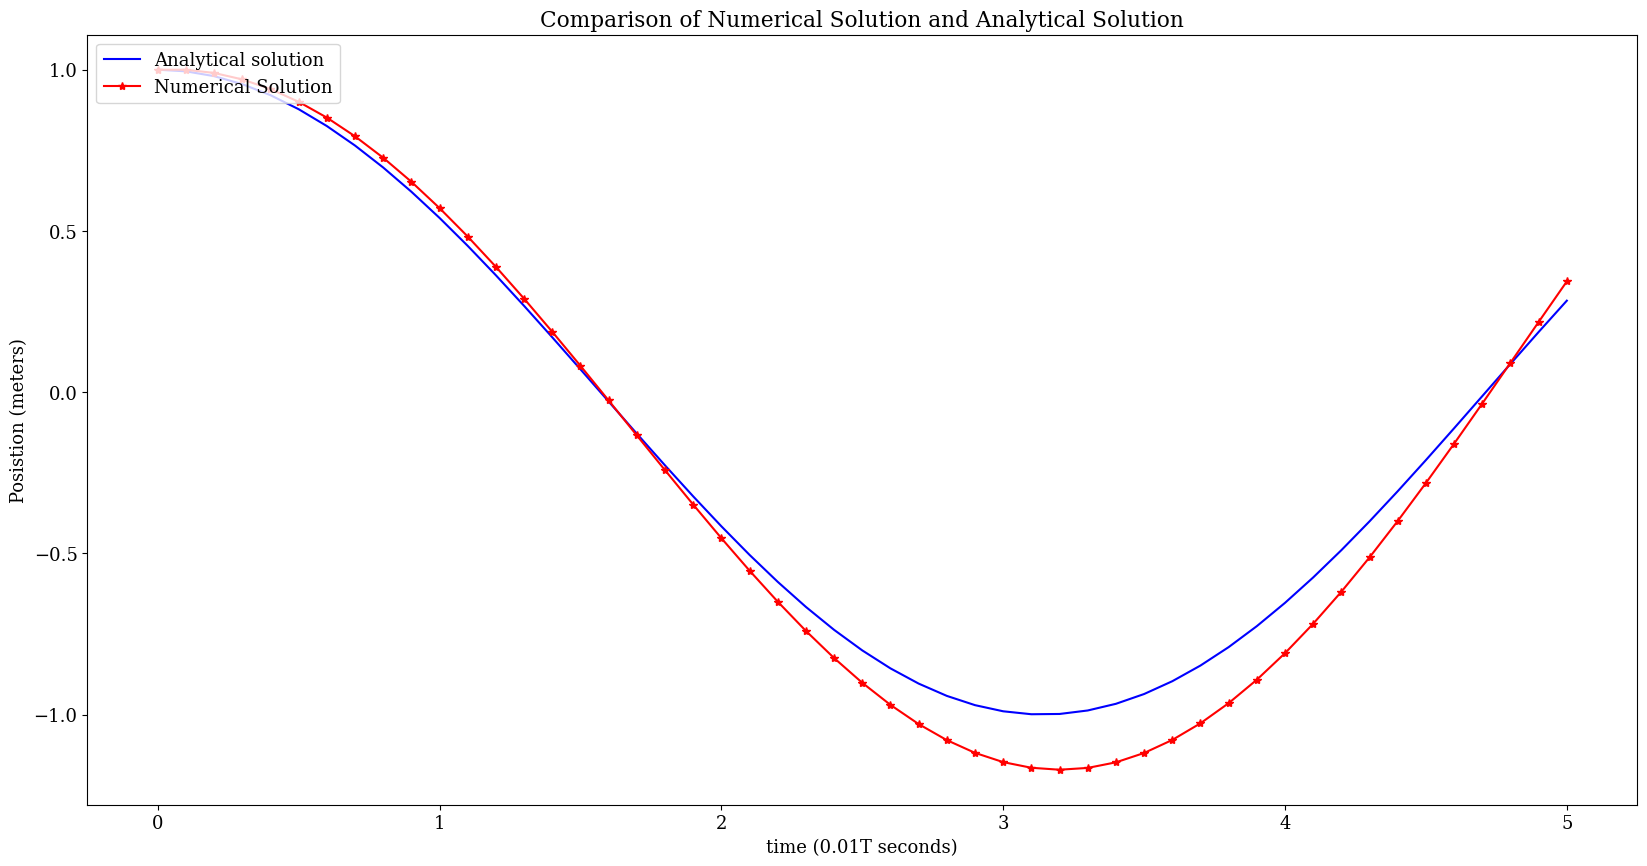

In [8]:
t_array = np.arange(t0, tf, dt)
k       = 1
m       = 1

#generating an array containing analytically computed values
analytical = 1*np.cos( np.sqrt(k/m) * t_array)

#plotting the data
plt.figure(figsize=(20,10))
plt.plot(t_array, analytical, 'b', label = 'Analytical solution' )
plt.plot(t_array, result_x, 'r*-', label = 'Numerical Solution')
plt.legend(loc = 2)
plt.xlabel('time (0.01T seconds)')
plt.ylabel('Posistion (meters)')
plt.title('Comparison of Numerical Solution and Analytical Solution')
plt.show

# calculating the mean value of error
mean_error_euler = np.mean( abs( abs(analytical) - abs(result_x) ) )
print(f"The mean value of error for simple Euler Method is: {mean_error_euler}")


### comment
## The numerical solution diverges away from the analytical solution as time progresses

The formula we used for computing mean error was:
$$ Mean |  |x_{Analytical}| - |x_{Numerical}|  | $$

Redo the same exercice for dt=0.2, 0.4, 0.8, 1.6,Comment ?

<function matplotlib.pyplot.show(close=None, block=None)>

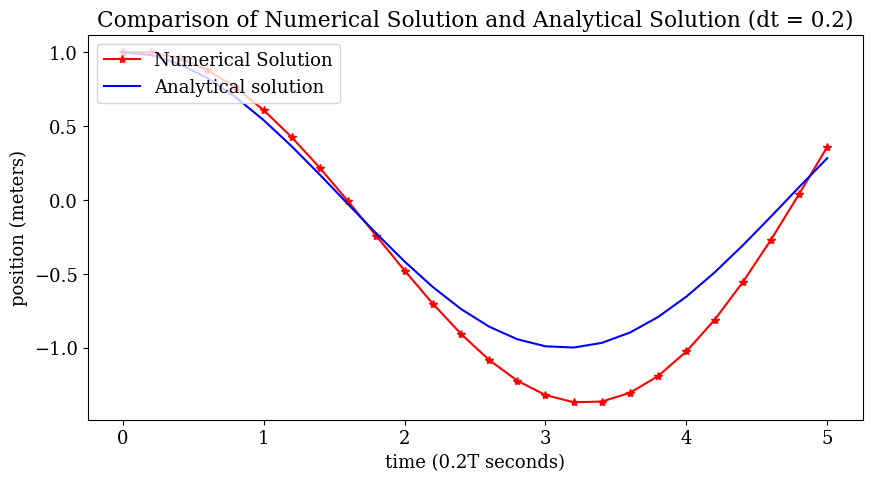

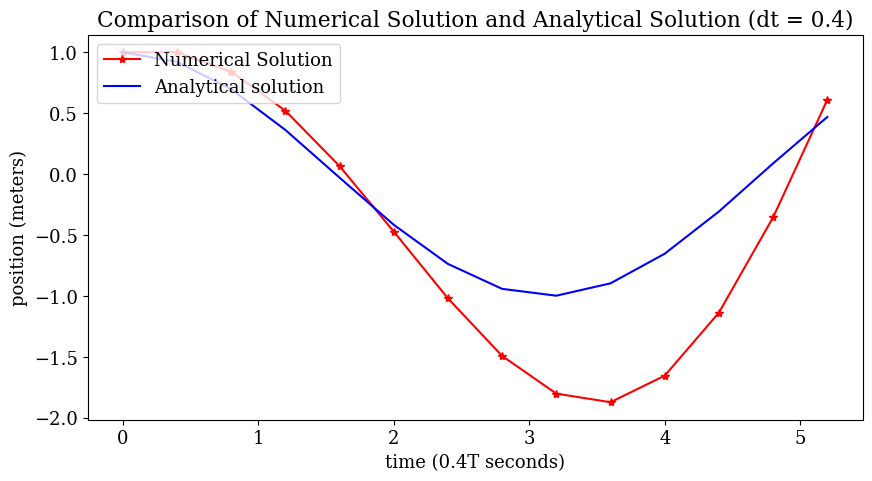

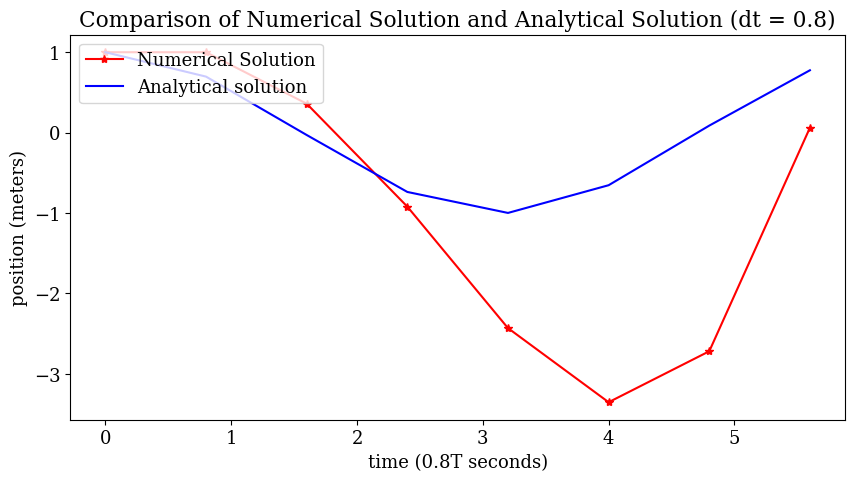

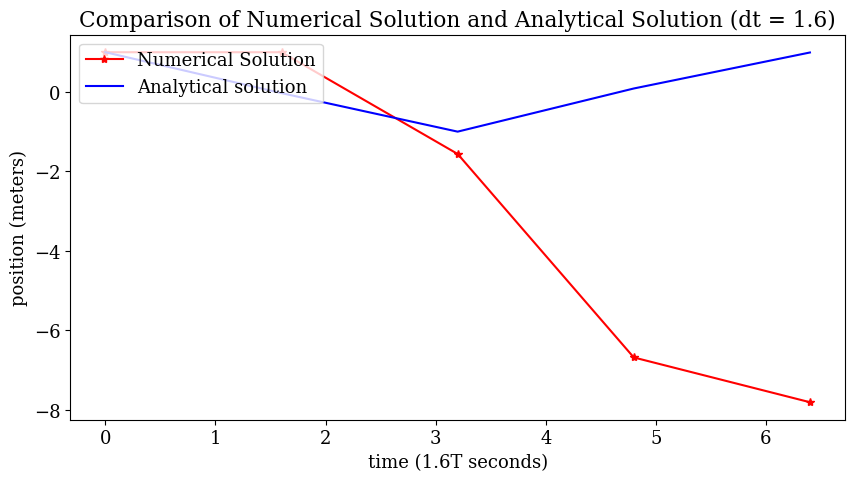

In [9]:
k  = 1
m  = 1
x0 = 1
v0 = 0



# dt = 0.2
plt.figure(figsize=(10,5))
dt = 0.2
t0 = 0
tf = 5 + dt
t_array = np.arange(t0, tf, dt)

result_x, result_v = euler_solver(t0, tf, dt, x0, v0, deriv)

plt.plot(t_array, result_x, 'r*-', label = 'Numerical Solution')
plt.plot(t_array, 1*np.cos( np.sqrt(k/m) * t_array), 'b', label = 'Analytical solution' )

plt.legend(loc = 2)
plt.xlabel('time (0.2T seconds)')
plt.ylabel('position (meters)')
plt.title('Comparison of Numerical Solution and Analytical Solution (dt = 0.2)')
plt.show





# dt = 0.4
plt.figure(figsize=(10,5))
dt = 0.4
t0 = 0
tf = 5 + dt
t_array = np.arange(t0, tf, dt)

result_x, result_v = euler_solver(t0, tf, dt, x0, v0, deriv)

plt.plot(t_array, result_x, 'r*-', label = 'Numerical Solution')
plt.plot(t_array, 1*np.cos( np.sqrt(k/m) * t_array), 'b', label = 'Analytical solution' )

plt.legend(loc = 2)
plt.xlabel('time (0.4T seconds)')
plt.ylabel('position (meters)')
plt.title('Comparison of Numerical Solution and Analytical Solution (dt = 0.4)')
plt.show




# dt = 0.8
plt.figure(figsize=(10,5))
dt = 0.8
t0 = 0
tf = 5 + dt
t_array = np.arange(t0, tf, dt)

result_x, result_v = euler_solver(t0, tf, dt, x0, v0, deriv)

plt.plot(t_array, result_x, 'r*-', label = 'Numerical Solution')
plt.plot(t_array, 1*np.cos( np.sqrt(k/m) * t_array), 'b', label = 'Analytical solution' )

plt.legend(loc = 2)
plt.xlabel('time (0.8T seconds)')
plt.ylabel('position (meters)')
plt.title('Comparison of Numerical Solution and Analytical Solution (dt = 0.8)')
plt.show




# dt = 1.6
plt.figure(figsize=(10,5))
dt = 1.6
t0 = 0
tf = 5 + dt
t_array = np.arange(t0, tf, dt)

result_x, result_v = euler_solver(t0, tf, dt, x0, v0, deriv)

plt.plot(t_array, result_x, 'r*-', label = 'Numerical Solution')
plt.plot(t_array, 1*np.cos( np.sqrt(k/m) * t_array), 'b', label = 'Analytical solution' )

plt.legend(loc = 2)
plt.xlabel('time (1.6T seconds)')
plt.ylabel('position (meters)')
plt.title('Comparison of Numerical Solution and Analytical Solution (dt = 1.6)')
plt.show


### Comment
#### As the step size size increases, our numerical solution becomes less accurate.
#### It also diverges away from the analytical solution faster, if the step size is big.

#### 1.2 Second order solver


Redo the same as before, but with the modifed Euler explicit scheme (see lecture)

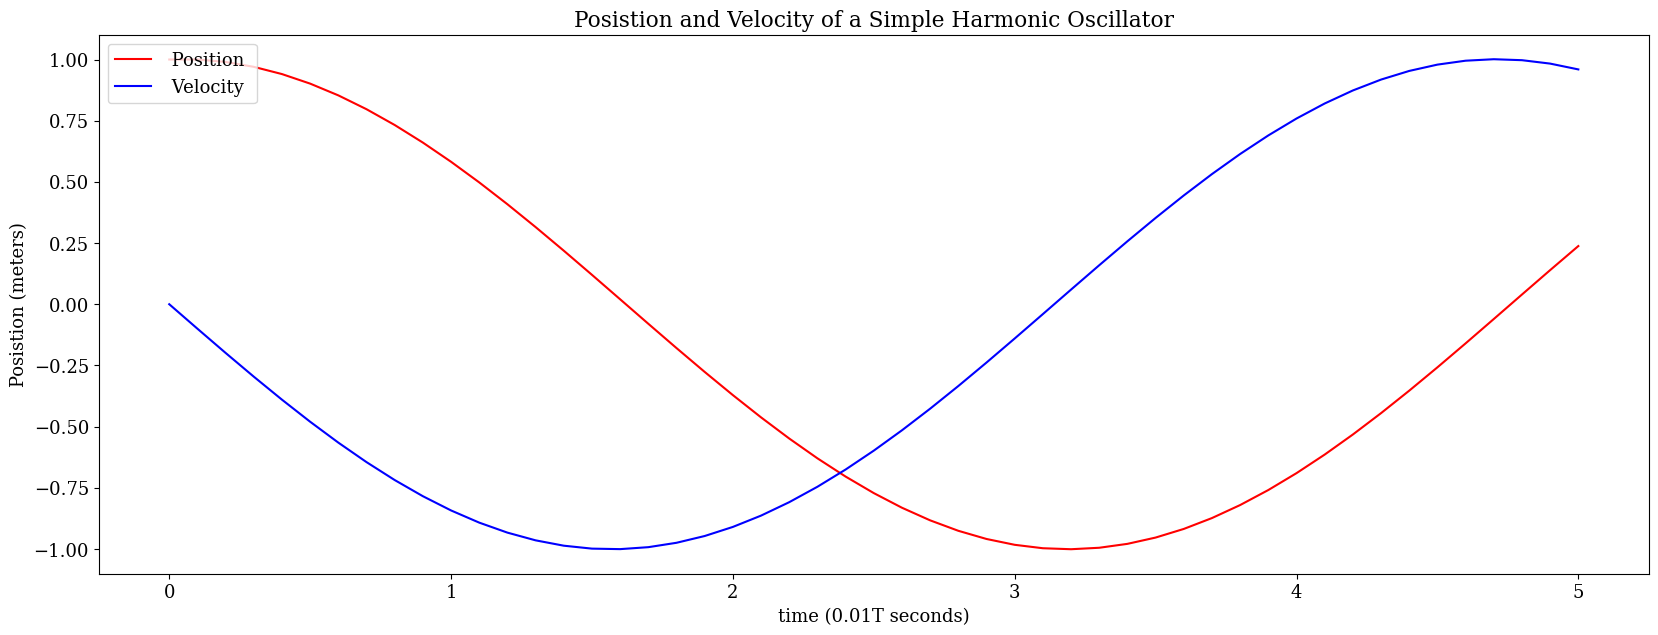

In [10]:
def deriv2(t,v,x):
    global k
    f = -k*x
    return f

k  = 1



def modified_euler_solver(time_initial, time_final, step_size, x_initial, v_initial, function):

    time_array = np.arange(time_initial, time_final, step_size)
    
    x = np.array([])
    x = np.append(x,x_initial)
    
    v = np.array([])
    v = np.append(v,v_initial)

    
    
    for i in range( len(time_array) - 1 ):
        
        x_i_plus_1 = x[i] + step_size * v[i]
        x          = np.append(x,x_i_plus_1)
        
        v_i_plus_1 = v[i] + step_size * function( time_array[i] + 0.5 * step_size,   v[i] +  0.5 * step_size * function(time_array[i], v[i],   x[i]),    x[i] + step_size * v[i])                                 
        v          = np.append(v,v_i_plus_1)
        
    
    return x, v


dt  = 0.1
t0  = 0
tf  = 5 + dt
X0  = 1
v0  = 0        # using initial velocity = zero



result_x_m, result_v_m = modified_euler_solver(t0, tf, dt, x0, v0, deriv2)



plt.figure(figsize=(20,7))
plt.plot(np.arange(t0, tf, dt), result_x_m, 'r',label=" Position ")
plt.plot(np.arange(t0, tf, dt), result_v_m, 'b',label=" Velocity ")
plt.legend(loc = 2)
plt.xlabel('time (0.01T seconds)')
plt.ylabel('Posistion (meters)')
plt.title("Posistion and Velocity of a Simple Harmonic Oscillator")
plt.show()


The mean value of error for Modified Euler Method is: 0.03118700617758064


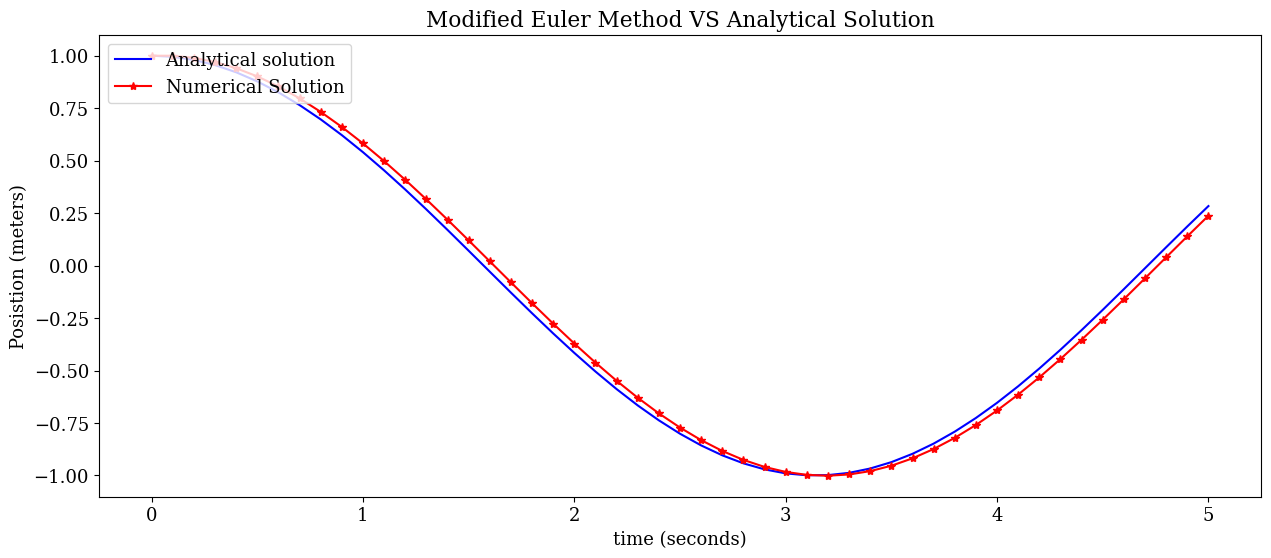

In [11]:
t_array = np.arange(t0, tf, dt)
k       = 1
m       = 1

#generating an array containing analytically computed values
analytical = 1*np.cos( np.sqrt(k/m) * t_array)


# plotting data
plt.figure(figsize=(15,6))
plt.plot(t_array, analytical, 'b', label = 'Analytical solution' )
plt.plot(t_array, result_x_m, 'r*-', label = 'Numerical Solution')
plt.legend(loc = 2)
plt.xlabel('time (seconds)')
plt.ylabel('Posistion (meters)')
plt.title('Modified Euler Method VS Analytical Solution')
plt.show


# calculating the mean value of error
mean_error_euler = np.mean( abs( abs(analytical) - abs(result_x_m) ) )
print(f"The mean value of error for Modified Euler Method is: {mean_error_euler}")


#### The mean value of error for Simple Euler Method was 
$$ 0.07677391949718335 $$
#### The mean value of error for Modified Euler Method is 
$$ 0.03118700617758064 $$

### So, without any doubt, the Modified  Euler Method gives better results

The formula we used for computing errors was:
$$ Mean |  |x_{Analytical}| - |x_{Numerical}|  | $$

## 2 Energy conservative system: orbital motion in 2D (2nd order solver)

We now solve an energy conservative system, with no, or complex solution. We consider the gravity equation of a body with mass M. The equation of motion is :

$\frac{dX^2 }{dt^2}=-\frac{GM}{r^2}\times\frac{X}{r}$


$\frac{dY^2 }{dt^2}=-\frac{GM}{r^2}\times\frac{Y}{r}$




Where G is the universal gravity constant and $r=(X^2+Y^2)^{1/2}$. This is a coupled system of 2 second order equations. Rewrite it as a system of 4 first order equations, using $Vx$ and $Vy$ : the X and Y component of velocity in cartesian coordinates.

The system of 4 first order equations is : 




We will take the Earth-Moon system (check mass values on internet, work in METRIC SYSTEM UNITS !!) We will consider that the initial position of the moon at time=0 is X=384000km , Y=0, and that its velocity is Vx=0, $Vy=+a \omega $, where $a$ is the inital Earth-Moon distance (called semi-major axis), and $\omega=(GM/a^3)^{1/2}$ is the orbital angular velocity. The orbital period of the Moon, in, in theory should be $T=2\pi/\omega$

Write a function called $gravderiv(X,Y,Vx,Vy,t)$ that returns the derivative of vector (X,Y,Vx,Vy)

In [12]:
G       =  6.67e-11
M_moon  =  7.34e22
M_earth =  5.97e24


# def gravderiv(tn, xn, yn, vxn, vyn):
    
#     deriv_vxn = ( -(G * M_moon)/(xn**2 + yn**2) ) * (xn/np.sqrt(xn**2 + yn**2 ))
    
#     deriv_vyn = ( -(G * M_moon)/(xn**2 + yn**2) ) * (yn/np.sqrt(xn**2 + yn**2 ))
    
#     deriv_x   = vxn
    
#     deriv_y   = vyn
    
#     return np.array([deriv_x, deriv_y, deriv_vxn, deriv_vyn])




def fx(xn, vxn, yn):
    output = ( -(G * M_moon)/(xn**2 + yn**2) ) * (xn/np.sqrt(xn**2 + yn**2 ))
    return output

def fy(yn, vyn, xn):
    output = ( -(G * M_moon)/(xn**2 + yn**2) ) * (yn/np.sqrt(xn**2 + yn**2 ))
    return output




Write a program that integrate the Moon motion, from time=0 to time=100T, using the Modified Euler method.

In [13]:
def grav_modified_euler(time_initial, time_final, step_size, x_initial, y_initial, vx_initial, vy_initial, x_function, y_function):
    
    time_array = np.arange(time_initial, time_final, step_size)
    x  = np.array([])
    x  = np.append(x,x_initial)
    
    y  = np.array([])
    y  = np.append(y,y_initial)
    
    vx = np.array([])
    vx = np.append(vx,vx_initial)

    vy = np.array([])
    vy = np.append(vy,vy_initial)
    
    
    
    for i in range( len(time_array) - 1 ):
        x_i_plus_1  =  x[i]  + step_size * vx[i]
        x           =  np.append(x,x_i_plus_1)
        
        vx_i_plus_1 =  vx[i] +      step_size*x_function(x[i] + step_size*vx[i],  vx[i] + 0.5*step_size*x_function(x[i], vx[i], y[i]),   y[i] + step_size*vy[i] )                                                    
        vx          =  np.append(vx,vx_i_plus_1)
        
        
        y_i_plus_1  =  y[i]  + step_size * vy[i]
        y           =  np.append(y,y_i_plus_1)
        
        vy_i_plus_1 =  vy[i] +      step_size*y_function(y[i] + step_size*vy[i],  vx[i] + 0.5*step_size*y_function(y[i], vy[i], x[i]),   x[i] + step_size*vx[i] )                                                    
        vy          =  np.append(vy,vy_i_plus_1)

    return time_array, x, y, vx, vy
    

Use first a time-step dt= 0.01T . Plot the Moon motion X(t), Y(t), Vx(t), Vy(t)

<function matplotlib.pyplot.show(close=None, block=None)>

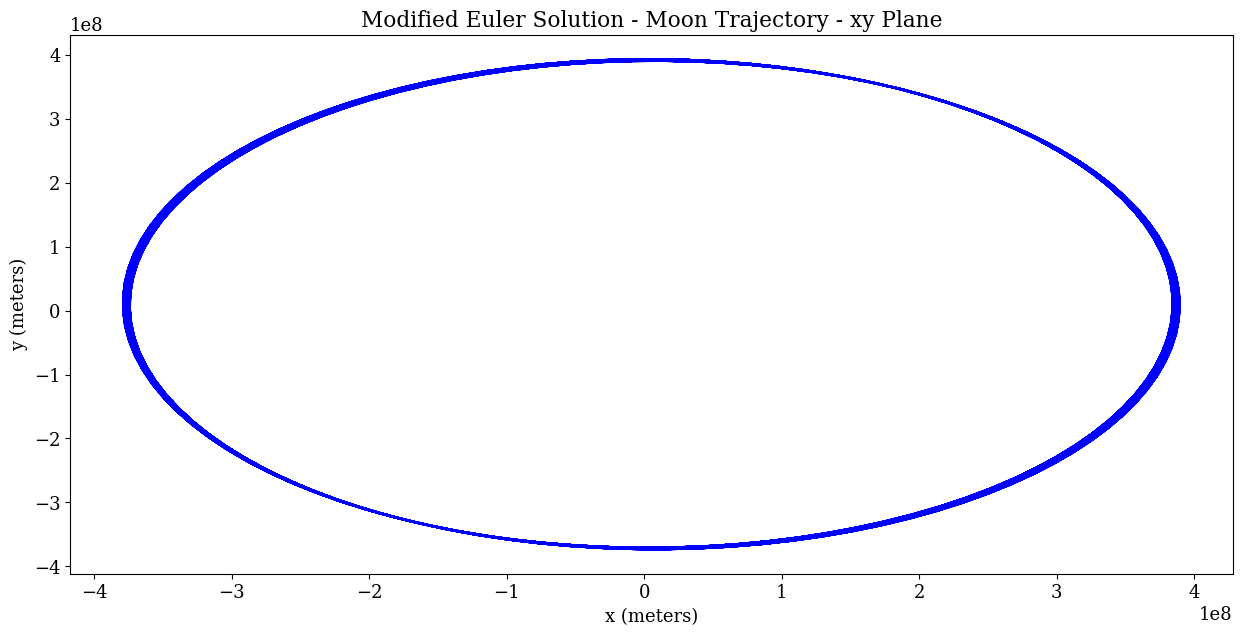

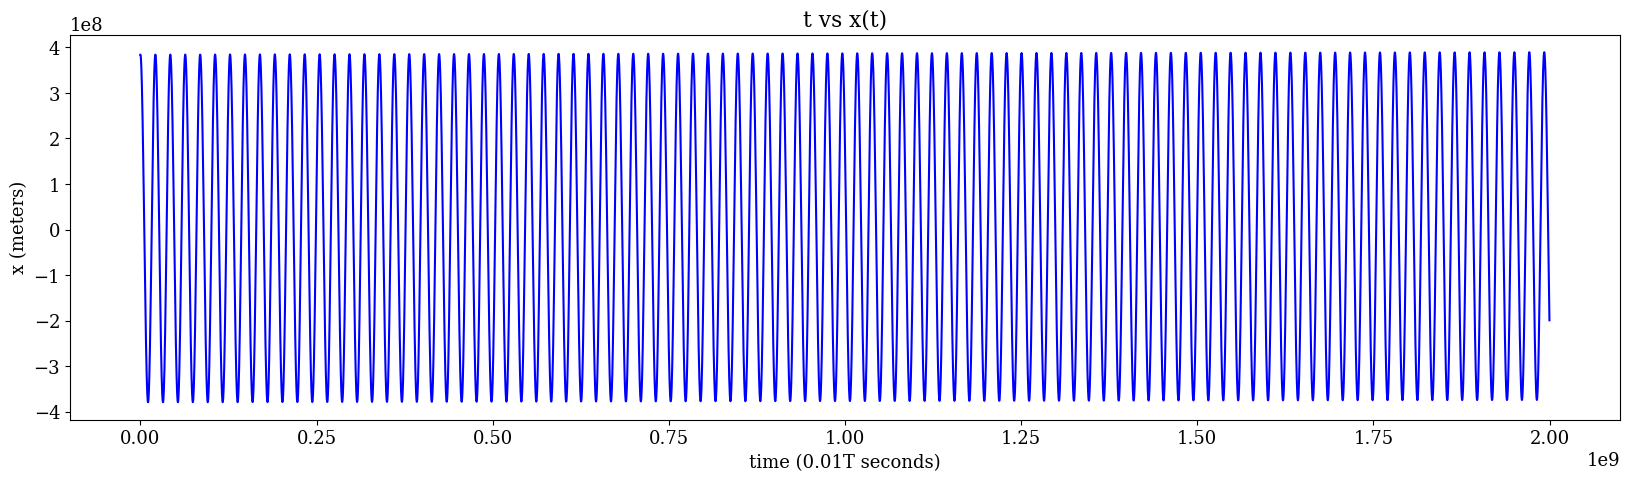

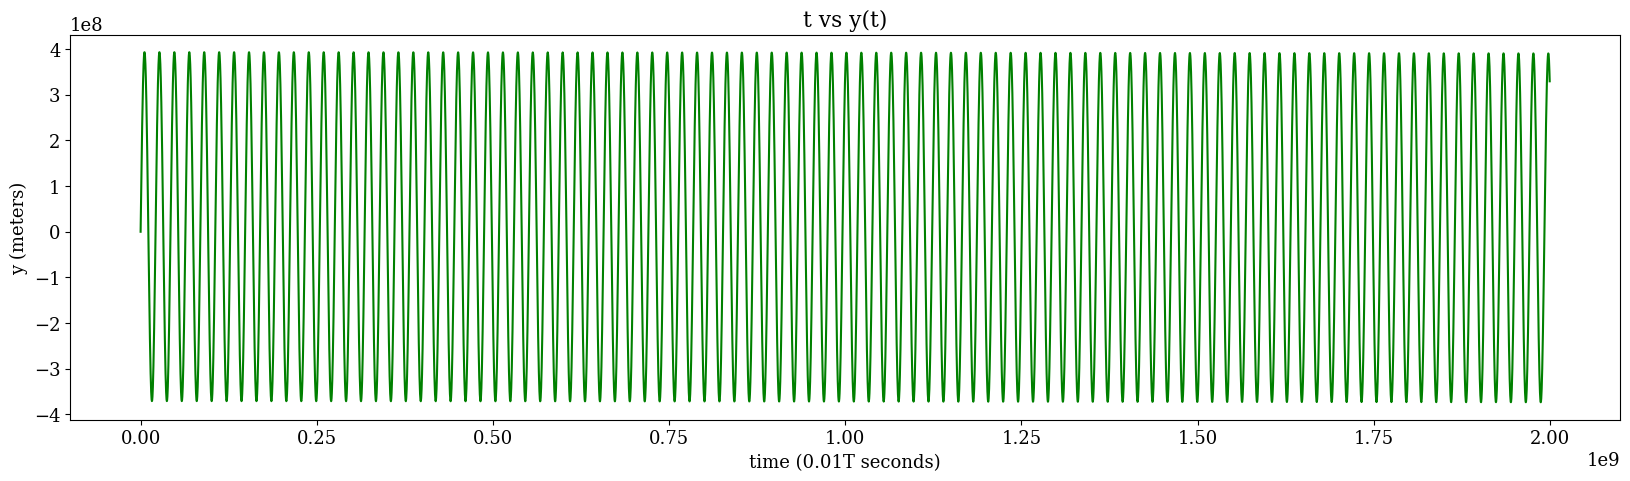

In [14]:
x0  = 384e6
vx0 = 0

y0  = 0
vy0 = (x0) * (2.93e-7)

t0 = 0
tf = 2e9

h = 2e5


t_array, px, py, x_vel, y_vel = grav_modified_euler(t0, tf, h, x0, y0, vx0, vy0, fx, fy)

plt.figure(figsize=(15,7))
plt.plot(px, py, 'b')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('Modified Euler Solution - Moon Trajectory - xy Plane')
plt.show

plt.figure(figsize=(20,5))
plt.plot(t_array, px, 'b')
plt.xlabel('time (0.01T seconds)')
plt.ylabel('x (meters)')
plt.title('t vs x(t)')
plt.show

plt.figure(figsize=(20,5))
plt.plot(t_array, py, 'g')
plt.xlabel('time (0.01T seconds)')
plt.ylabel('y (meters)')
plt.title('t vs y(t)')
plt.show


Compute at every time-step the total energy $E_T$ (Kinetic + Potential). Plot energy variations $\Delta_E(t)=\frac{E_T(t)-E_T(t=0)}{E_T(t=0)}$. Is energy really constant ? What happens in your opinion? 

The value of Total energy is oscillating
The maximum value of total energy is: -7.385703755031206e+28
The minimum value of total energy is: -7.838124155796502e+28
Since they are of the same order of magnitude, therefore we can say that our program is working pretty fine


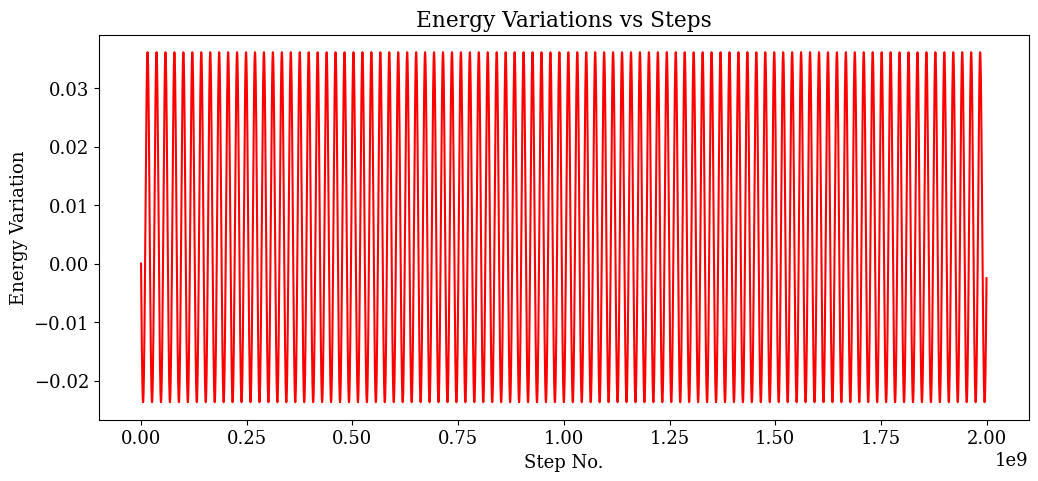

In [15]:
def E_total(x,y,vx,vy):
    total_E = 0.5 * M_moon * ((vx**2) + (vy**2)) - ((G * M_earth * M_moon)/(np.sqrt( (x**2) + (y**2) )))
    return total_E

total_energy = E_total(px, py, x_vel, y_vel)

variations = (abs(total_energy) - abs(total_energy[0]))/abs(total_energy[0])

plt.figure(figsize=(12,5))
plt.plot(t_array, variations, 'r', label = 'Total Energy')
plt.xlabel('Step No.')
plt.ylabel('Energy Variation')
plt.title('Energy Variations vs Steps')
plt.show

print(f"The value of Total energy is oscillating")
print(f"The maximum value of total energy is: {max(total_energy)}")
print(f"The minimum value of total energy is: {min(total_energy)}")
print(f"Since they are of the same order of magnitude, therefore we can say that our program is working pretty fine")

Redo the same for dt=0.1T and dt=0.5T: Plot the orbit in (X,Y) frame and $E_T$ as a function of time.

The value of Total energy is oscillating
The maximum value of total energy is: -5.156849658909526e+28
The minimum value of total energy is: -8.800227881453601e+28
Since they are of the same order of magnitude, therefore we can say that our program is working pretty fine


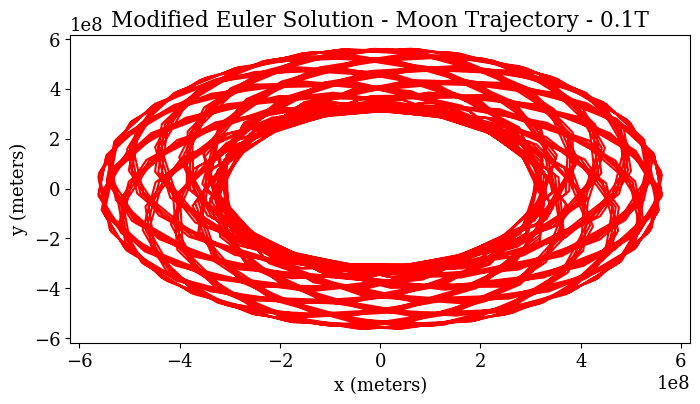

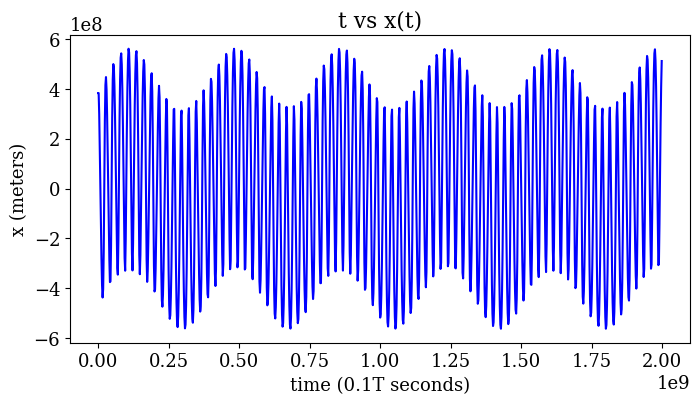

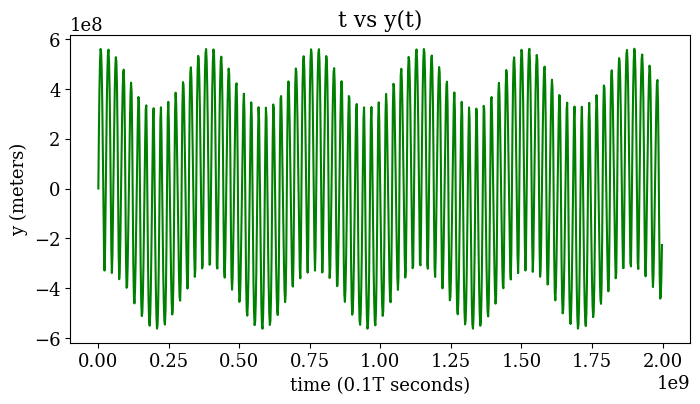

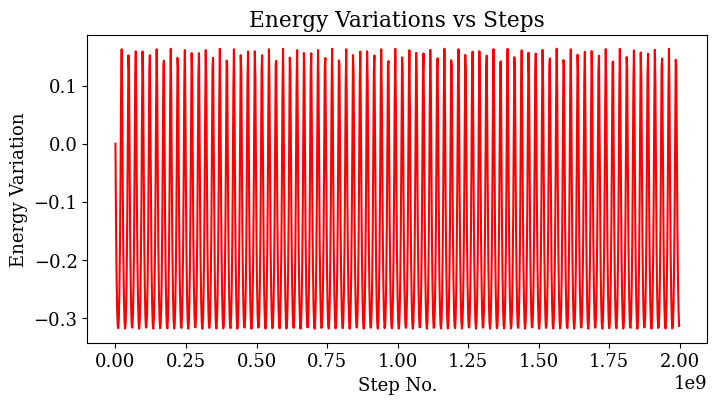

In [17]:
x0  = 384e6
vx0 = 0

y0  = 0
vy0 = (x0) * (2.93e-7)

t0 = 0
tf = 2e9

h = 2e6

#Trajectory calculation and plotting for 0.1T
t_array, px, py, x_vel, y_vel = grav_modified_euler(t0, tf, h, x0, y0, vx0, vy0, fx, fy)

plt.figure(figsize=(8,4))
plt.plot(px, py, 'r')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('Modified Euler Solution - Moon Trajectory - 0.1T')
plt.show

plt.figure(figsize=(8,4))
plt.plot(t_array, px, 'b')
plt.xlabel('time (0.1T seconds)')
plt.ylabel('x (meters)')
plt.title('t vs x(t)')
plt.show

plt.figure(figsize=(8,4))
plt.plot(t_array, py, 'g')
plt.xlabel('time (0.1T seconds)')
plt.ylabel('y (meters)')
plt.title('t vs y(t)')
plt.show


# Energy Calculations for 0.1T
total_energy = E_total(px, py, x_vel, y_vel)

variations = (abs(total_energy) - abs(total_energy[0]))/abs(total_energy[0])

plt.figure(figsize=(8,4))
plt.plot(t_array, variations, 'r', label = 'Total Energy')
plt.xlabel('Step No.')
plt.ylabel('Energy Variation')
plt.title('Energy Variations vs Steps')
plt.show

print(f"The value of Total energy is oscillating")
print(f"The maximum value of total energy is: {max(total_energy)}")
print(f"The minimum value of total energy is: {min(total_energy)}")
print(f"Since they are of the same order of magnitude, therefore we can say that our program is working pretty fine")


The value of Total energy is oscillating
The maximum value of total energy is: -4.923412614008001e+26
The minimum value of total energy is: -7.564949621721521e+28
Since they are NOT of the same order of magnitude, therefore we CANNOT say that 0.5T is a good step size


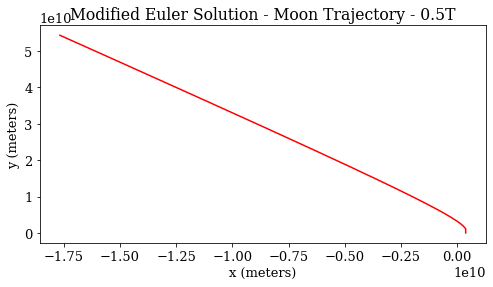

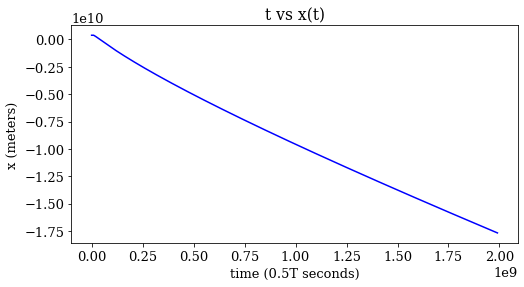

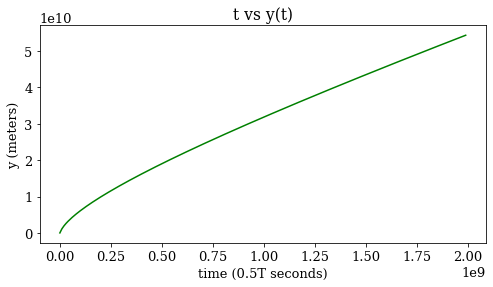

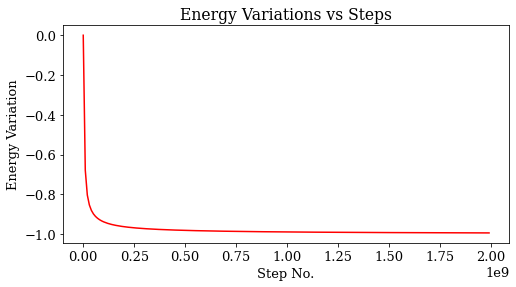

In [56]:
x0  = 384e6
vx0 = 0

y0  = 0
vy0 = (x0) * (2.93e-7)

t0 = 0
tf = 2e9

h = 0.5*2e7

#Trajectory calculation and plotting for 0.5T
t_array, px, py, x_vel, y_vel = grav_modified_euler(t0, tf, h, x0, y0, vx0, vy0, fx, fy)

plt.figure(figsize=(8,4))
plt.plot(px, py, 'r')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('Modified Euler Solution - Moon Trajectory - 0.5T')
plt.show

plt.figure(figsize=(8,4))
plt.plot(t_array, px, 'b')
plt.xlabel('time (0.5T seconds)')
plt.ylabel('x (meters)')
plt.title('t vs x(t)')
plt.show

plt.figure(figsize=(8,4))
plt.plot(t_array, py, 'g')
plt.xlabel('time (0.5T seconds)')
plt.ylabel('y (meters)')
plt.title('t vs y(t)')
plt.show


# Energy Calculations for 0.5T
total_energy = E_total(px, py, x_vel, y_vel)

variations = (abs(total_energy) - abs(total_energy[0]))/abs(total_energy[0])

plt.figure(figsize=(8,4))
plt.plot(t_array, variations, 'r', label = 'Total Energy')
plt.xlabel('Step No.')
plt.ylabel('Energy Variation')
plt.title('Energy Variations vs Steps')
plt.show

print(f"The value of Total energy is oscillating")
print(f"The maximum value of total energy is: {max(total_energy)}")
print(f"The minimum value of total energy is: {min(total_energy)}")
print(f"Since they are NOT of the same order of magnitude, therefore we CANNOT say that 0.5T is a good step size")


In [ ]:
Conclusion : What time-step should you use ? 
    

### 0.01T is giving the best results, furthermore it's also very fast, so, I'll stick with 0.01T 

How to control the quality of your solution  in your opinion?

### Clearly, in order to improve the quality of your solution, you simply decrease the step size, but decreasing the step size, increases the total number of steps and so, your program runs more slowly.

Now, let's considere a more complicated orbit. Start the same integration, but now the initial velocity has a small X component initially à t=0: $Vx=e V_y$, $Vy=+a \omega $, with $abs(e) < 1$. Choose e=0.01 and then e=0.1.

<function matplotlib.pyplot.show(close=None, block=None)>

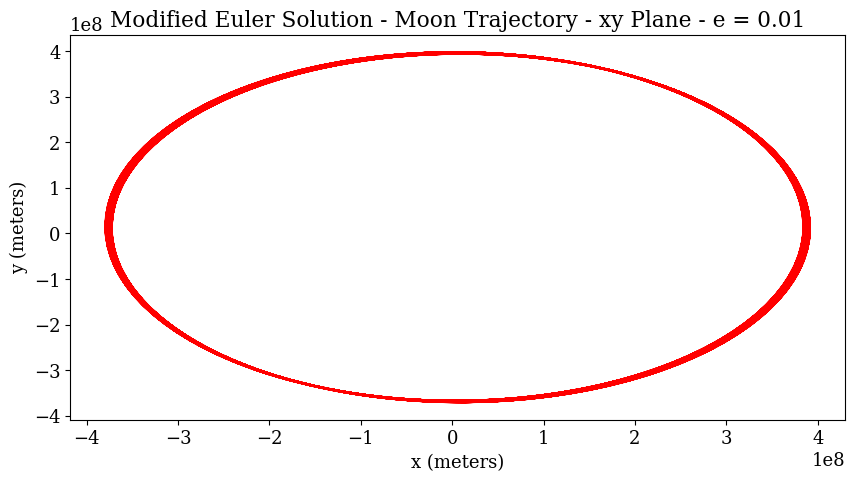

In [18]:
e   = 0.01

y0  = 0
vy0 = (2.93e-7) * (384e6)

x0  = 384e6
vx0 = e * vy0


t0 = 0
tf = 2e9

h = 2e5

#Trajectory calculation for e = 0.01
t_array, px, py, x_vel, y_vel = grav_modified_euler(t0, tf, h, x0, y0, vx0, vy0, fx, fy)

#plotting the Trajectory
plt.figure(figsize=(10,5))
plt.plot(px, py, 'r')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('Modified Euler Solution - Moon Trajectory - xy Plane - e = 0.01')
plt.show 


<function matplotlib.pyplot.show(close=None, block=None)>

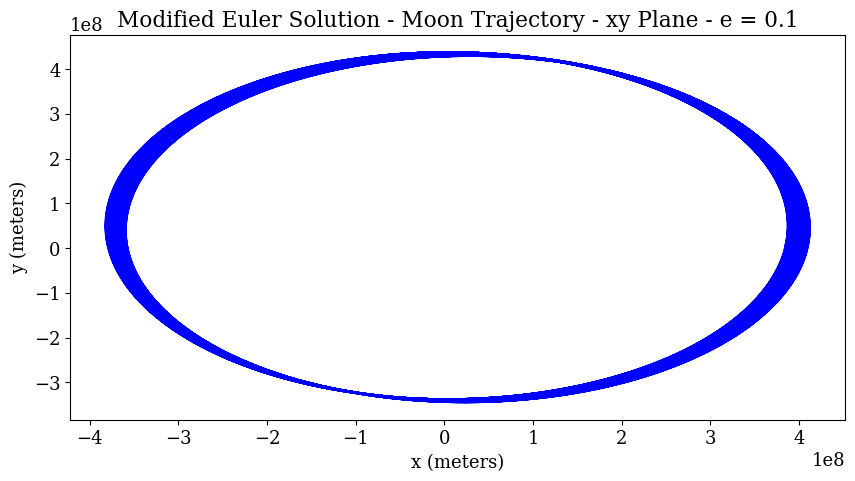

In [19]:
e   = 0.1

y0  = 0
vy0 = (2.93e-7) * (384e6)

x0  = 384e6
vx0 = e * vy0


t0 = 0
tf = 2e9

h = 2e5

#Trajectory calculation for e = 0.1
t_array, px, py, x_vel, y_vel = grav_modified_euler(t0, tf, h, x0, y0, vx0, vy0, fx, fy)

#plotting the Trajectory
plt.figure(figsize=(10,5))
plt.plot(px, py, 'b')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('Modified Euler Solution - Moon Trajectory - xy Plane - e = 0.1')
plt.show 


Display energy variations for e=0.01 and then e=0.1. What do you see ?

The value of Total energy is oscillating
The maximum value of total energy is: -6.638718673338856e+28
The minimum value of total energy is: -8.583075157438225e+28


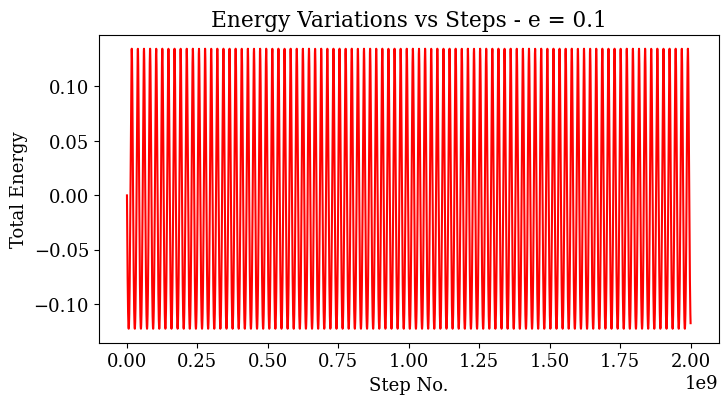

In [20]:
e   = 0.1

y0  = 0
vy0 = (2.93e-7) * (384e6)

x0  = 384e6
vx0 = e * vy0


t0 = 0
tf = 2e9

h = 2e5

#Trajectory calculation for e = 0.1
t_array, px, py, x_vel, y_vel = grav_modified_euler(t0, tf, h, x0, y0, vx0, vy0, fx, fy)


# Energy Calculations for e = 0.1
total_energy = E_total(px, py, x_vel, y_vel)

variations = (abs(total_energy) - abs(total_energy[0]))/abs(total_energy[0])

plt.figure(figsize=(8,4))
plt.plot(t_array, variations, 'r', label = 'Total Energy')
plt.xlabel('Step No.')
plt.ylabel('Total Energy')
plt.title('Energy Variations vs Steps - e = 0.1')
plt.show

print(f"The value of Total energy is oscillating")
print(f"The maximum value of total energy is: {max(total_energy)}")
print(f"The minimum value of total energy is: {min(total_energy)}")


The value of Total energy is oscillating
The maximum value of total energy is: -7.311914784576793e+28
The minimum value of total energy is: -7.911824896660007e+28
The energy Variations are CLEARLY smaller in the case of an ORBIT with e = 0.01


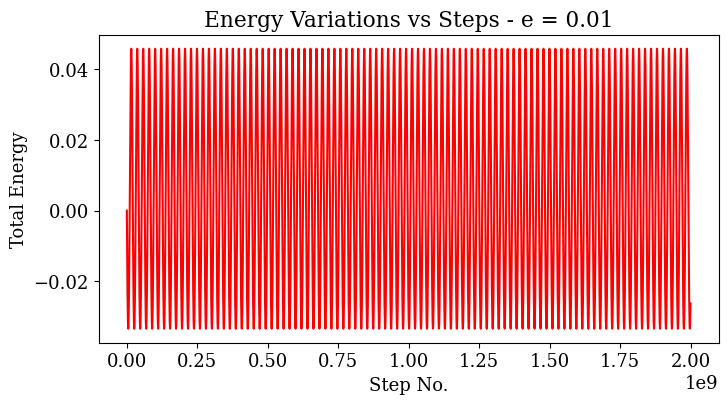

In [21]:
e   = 0.01

y0  = 0
vy0 = (2.93e-7) * (384e6)

x0  = 384e6
vx0 = e * vy0


t0 = 0
tf = 2e9

h = 2e5

#Trajectory calculation for e = 0.01
t_array, px, py, x_vel, y_vel = grav_modified_euler(t0, tf, h, x0, y0, vx0, vy0, fx, fy)


# Energy Calculations for e = 0.01
total_energy = E_total(px, py, x_vel, y_vel)

variations = (abs(total_energy) - abs(total_energy[0]))/abs(total_energy[0])

plt.figure(figsize=(8,4))
plt.plot(t_array, variations, 'r', label = 'Total Energy')
plt.xlabel('Step No.')
plt.ylabel('Total Energy')
plt.title('Energy Variations vs Steps - e = 0.01')
plt.show

print(f"The value of Total energy is oscillating")
print(f"The maximum value of total energy is: {max(total_energy)}")
print(f"The minimum value of total energy is: {min(total_energy)}")
print(f"The energy Variations are CLEARLY smaller in the case of an ORBIT with e = 0.01")


## 3 Energy conservative system 2 : going to 4th order

Reuse the function that computes the derive in case of planetary motion (exercice 2). Now change the solver and code a Runge Kutta 4 scheme, that is 4th order. Put your code below. 

In [25]:
def fx(xn, yn, vxn, vyn):
    output = ( -(G * M_moon)/(xn**2 + yn**2) ) * (xn/np.sqrt(xn**2 + yn**2 ))
    return output

def fy(xn, yn, vxn, vyn):
    output = ( -(G * M_moon)/(xn**2 + yn**2) ) * (yn/np.sqrt(xn**2 + yn**2 ))
    return output


def rk4_solver(time_initial, time_final, step_size, x_initial, y_initial, vx_initial,  vy_initial, x_function, y_function):
    ''' 
    Source:
    pg = 376
    A first course in Differential Equations by D.G Zill 10th edition
    
    We generalized the method to solve one 2nd order differential equation using rk4
    TO Solve
    Two 2nd order coupled ordinary differential equations
    '''
    time_array = np.arange(time_initial, time_final, step_size)
    x  = np.array([])
    x  = np.append(x,x_initial)
    
    y  = np.array([])
    y  = np.append(y,y_initial)
    
    vx = np.array([])
    vx = np.append(vx,vx_initial)

    vy = np.array([])
    vy = np.append(vy,vy_initial)

    
    for i in range( len(time_array) - 1 ):
        
        m1x  = step_size*vx[i]
        m1y  = step_size*vy[i]
        k1x = step_size*x_function(x[i], y[i], vx[i], vy[i])
        k1y = step_size*y_function(x[i], y[i], vx[i], vy[i])
        
        
        
        m2x  = step_size*(vx[i] + 0.5*k1x)
        m2y  = step_size*(vy[i] + 0.5*k1y)
        k2x = step_size*x_function(x[i] + 0.5*m1x,   y[i] + 0.5*m1y,   vx[i] + 0.5*k1x,   vy[i] + 0.5*k1y)
        k2y = step_size*y_function(x[i] + 0.5*m1x,   y[i] + 0.5*m1y,   vx[i] + 0.5*k1x,   vy[i] + 0.5*k1y)
        
        
        
        m3x  = step_size*(vx[i] + 0.5*k2x)
        m3y  = step_size*(vy[i] + 0.5*k2y)
        k3x = step_size*x_function(x[i] + 0.5*m2x,   y[i] + 0.5*m2y,   vx[i] + 0.5*k2x,   vy[i] + 0.5*k2y)
        k3y = step_size*y_function(x[i] + 0.5*m2x,   y[i] + 0.5*m2y,   vx[i] + 0.5*k2x,   vy[i] + 0.5*k2y)
        
        
        
        m4x  = step_size*(vx[i] + k3x)
        m4y  = step_size*(vy[i] + k3y)
        k4x = step_size*x_function(x[i] + m3x,   y[i] + m3y,   vx[i] + k3x,   vy[i] + k3y)
        k4y = step_size*y_function(x[i] + m3x,   y[i] + m3y,   vx[i] + k3x,   vy[i] + k3y)
        
        
        
        x_i_plus_1  =  x[i]  + (m1x + 2*m2x + 2*m3x + m4x)/6
        x           =  np.append(x,x_i_plus_1)
        
        
        y_i_plus_1  =  y[i]  + (m1y + 2*m2y + 2*m3y + m4y)/6
        y           =  np.append(y,y_i_plus_1)

        
        vx_i_plus_1 =  vx[i] + (k1x + 2*k2x + 2*k3x + k4x)/6
        vx          =  np.append(vx,vx_i_plus_1)
                
        
        vy_i_plus_1 =  vy[i] + (k1y + 2*k2y + 2*k3y + k4y)/6
        vy          =  np.append(vy,vy_i_plus_1)

        
    return time_array, x, y, vx, vy


    Source:
    pg = 376
    A first course in Differential Equations by D.G Zill 10th edition
    
    We generalized the method to solve one 2nd order differential equation using rk4
    TO Solve
    Two 2nd order coupled ordinary differential equations


Using the same time-steps as before, plot the motion of the moon, and now compute and display energy variations as a function of time.

The value of Total energy is oscillating
The maximum value of total energy is: -7.564949621721521e+28
The minimum value of total energy is: -7.672504930433922e+28
Since they are of the same order of magnitude, therefore we say that RK4 metod is a pretty good method


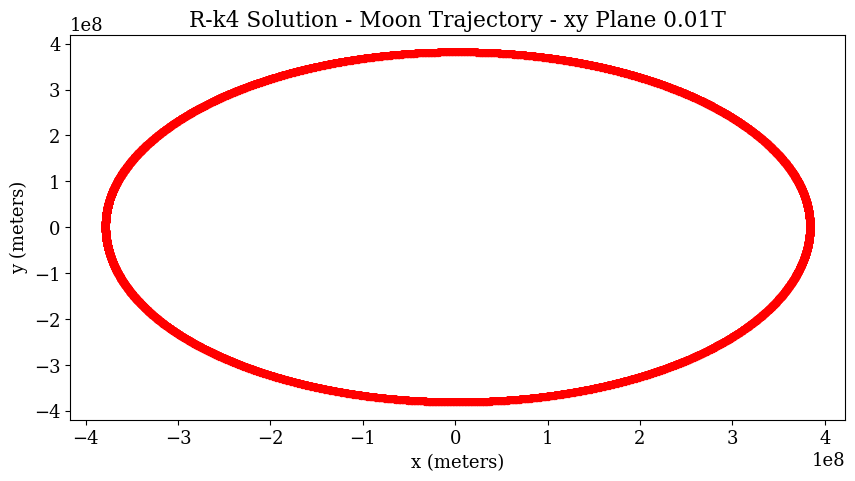

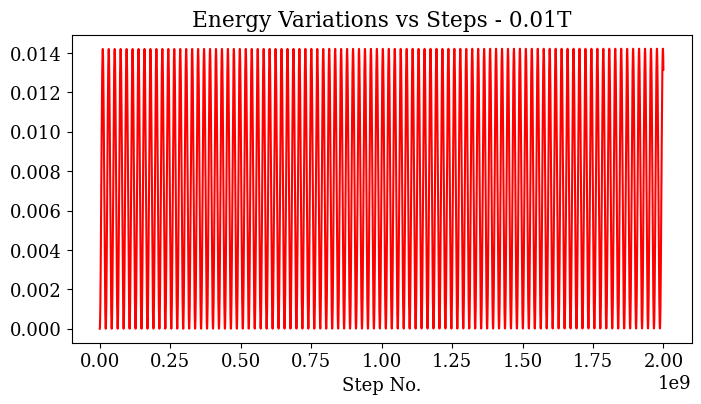

In [26]:
#Calculating Trajectory
x0  = 384e6
vx0 = 0

y0  = 0
vy0 = (x0) * (2.93e-7)

t0 = 0
tf = 2e9

h = 2e5


t_array, px, py, x_vel, y_vel = rk4_solver(t0, tf, h, x0, y0, vx0, vy0, fx, fy)



#plotting the trajectory of moon
plt.figure(figsize=(10,5))
plt.plot(px, py, 'r*')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('R-k4 Solution - Moon Trajectory - xy Plane 0.01T')
plt.show


#calculating and plotting energy variations

total_energy = E_total(px, py, x_vel, y_vel)

variations = (abs(total_energy) - abs(total_energy[0]))/abs(total_energy[0])

plt.figure(figsize=(8,4))
plt.plot(t_array, variations, 'r', label = 'Energy Variation')
plt.xlabel('Step No.')
plt.title('Energy Variations vs Steps - 0.01T')
plt.show

print(f"The value of Total energy is oscillating")
print(f"The maximum value of total energy is: {max(total_energy)}")
print(f"The minimum value of total energy is: {min(total_energy)}")
print(f"Since they are of the same order of magnitude, therefore we say that RK4 metod is a pretty good method")


The value of Total energy is oscillating
The maximum value of total energy is: 4.881036913677355e+26
The minimum value of total energy is: -2.249546254577978e+29
Since they DO NOT HAVE the same order of magnitude, therefore we say that 0.1T is not a good step size


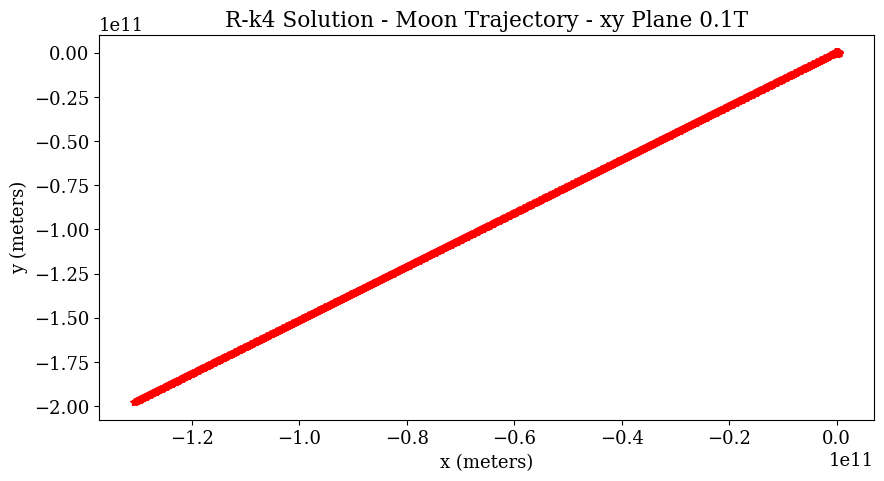

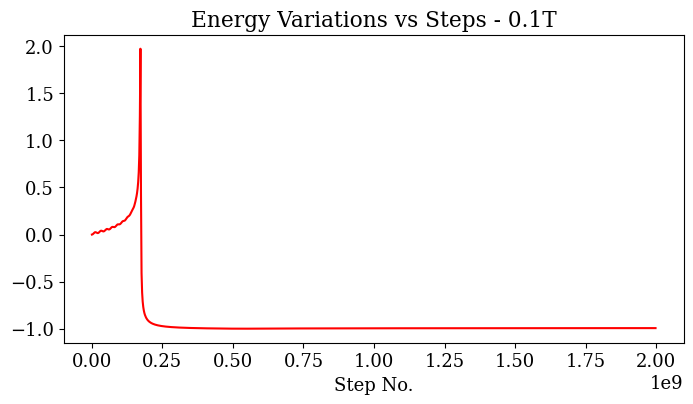

In [30]:
#Calculating Trajectory
x0  = 384e6
vx0 = 0

y0  = 0
vy0 = (x0) * (2.93e-7)

t0 = 0
tf = 2e9

h = 2e6


t_array, px, py, x_vel, y_vel = rk4_solver(t0, tf, h, x0, y0, vx0, vy0, fx, fy)



#plotting the trajectory of moon
plt.figure(figsize=(10,5))
plt.plot(px, py, 'r*')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('R-k4 Solution - Moon Trajectory - xy Plane 0.1T')
plt.show


#calculating and plotting energy variations

total_energy = E_total(px, py, x_vel, y_vel)

variations = (abs(total_energy) - abs(total_energy[0]))/abs(total_energy[0])

plt.figure(figsize=(8,4))
plt.plot(t_array, variations, 'r', label = 'Total Energy')
plt.xlabel('Step No.')
plt.title('Energy Variations vs Steps - 0.1T')
plt.show

print(f"The value of Total energy is oscillating")
print(f"The maximum value of total energy is: {max(total_energy)}")
print(f"The minimum value of total energy is: {min(total_energy)}")
print(f"Since they DO NOT HAVE the same order of magnitude, therefore we say that 0.1T is not a good step size")


The value of Total energy is oscillating
The maximum value of total energy is: 8.321402141365836e+27
The minimum value of total energy is: -7.564949621721521e+28
Since they DO NOT HAVE the same order of magnitude, therefore we say that 0.5T is a pretty good step size


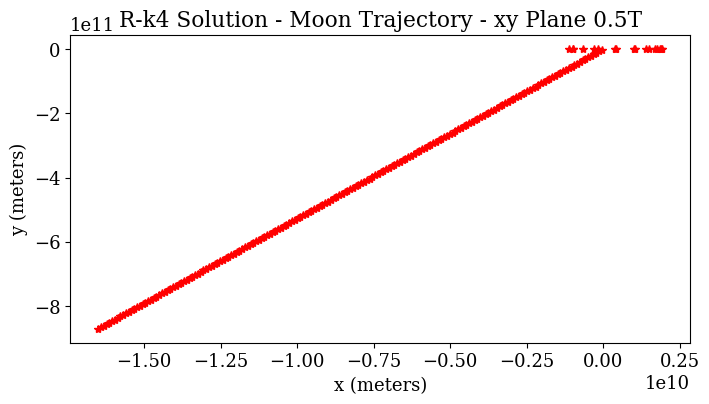

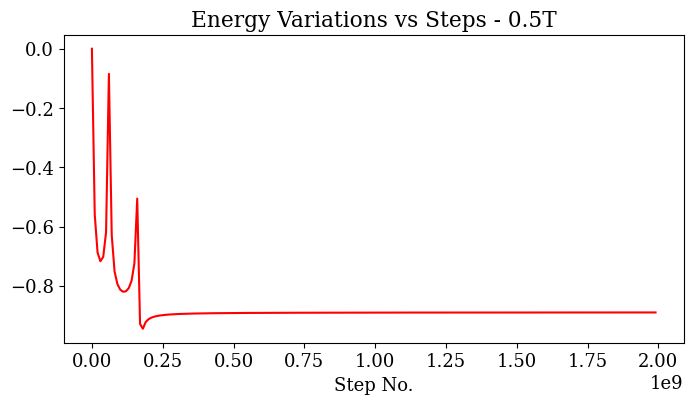

In [31]:
#Calculating Trajectory
x0  = 384e6
vx0 = 0

y0  = 0
vy0 = (x0) * (2.93e-7)

t0 = 0
tf = 2e9

h = 0.5*2e7


t_array, px, py, x_vel, y_vel = rk4_solver(t0, tf, h, x0, y0, vx0, vy0, fx, fy)



#plotting the trajectory of moon
plt.figure(figsize=(8,4))
plt.plot(px, py, 'r*')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('R-k4 Solution - Moon Trajectory - xy Plane 0.5T')
plt.show


#calculating and plotting energy variations

total_energy = E_total(px, py, x_vel, y_vel)

variations = (abs(total_energy) - abs(total_energy[0]))/abs(total_energy[0])

plt.figure(figsize=(8,4))
plt.plot(t_array, variations, 'r', label = 'Total Energy')
plt.xlabel('Step No.')
plt.title('Energy Variations vs Steps - 0.5T')
plt.show

print(f"The value of Total energy is oscillating")
print(f"The maximum value of total energy is: {max(total_energy)}")
print(f"The minimum value of total energy is: {min(total_energy)}")
print(f"Since they DO NOT HAVE the same order of magnitude, therefore we say that 0.5T is a pretty good step size")


It may be also interesting to plot the angular momentum of the Moon as a function of time. This should be also conserved. Is it the case ?

The value of Total energy is oscillating
The maximum value of total energy is: 3.17129797974522e+33
The minimum value of total energy is: 3.171198803698336e+33
Since they HAVE the same order of magnitude, therefore we say that angular momentum is also conserved


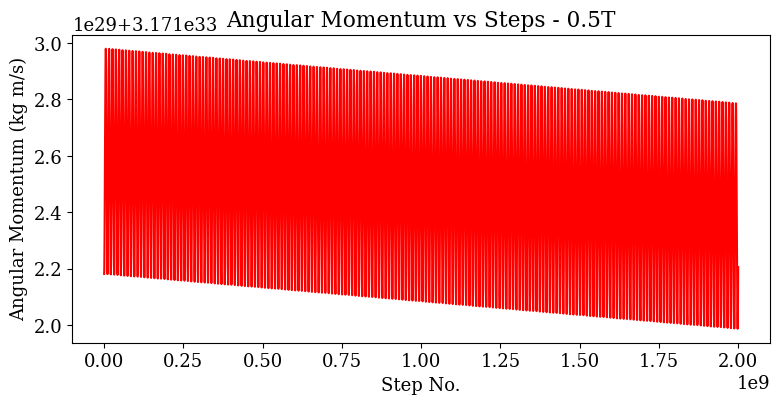

In [32]:
#calculating and plotting angular momentum

h = 2e5
t_array, px, py, x_vel, y_vel = rk4_solver(t0, tf, h, x0, y0, vx0, vy0, fx, fy)


a_mom = M_moon * np.sqrt( px**2 + py**2 ) * np.sqrt( x_vel**2 + y_vel**2 )


plt.figure(figsize=(9,4))
plt.plot(t_array, a_mom, 'r', label = "Angular Momentum")
plt.xlabel('Step No.')
plt.ylabel('Angular Momentum (kg m/s)')
plt.title('Angular Momentum vs Steps - 0.5T')
plt.show

print(f"The value of Total energy is oscillating")
print(f"The maximum value of total energy is: {max(a_mom)}")
print(f"The minimum value of total energy is: {min(a_mom)}")
print(f"Since they HAVE the same order of magnitude, therefore we say that angular momentum is also conserved")


## 4 : Interest of implicit solver ! Free-Fall in a viscous fluid

We consider the motion of a particule with mass m, radius r free-faling in a fluid. The particle is inserted at altitude Z with 0 velocity initially.  It suffers the weight force ($Fg=-mg$) plus a friction force, the "Stokes Force", so that :

$F_S =-6\pi \mu r v$

with $\mu$ is the fluid dynamical viscosity (in $Pa S$) , r is the particle radius, and v is its velocity (positive when directed upward, negative when directed downward, so that the Z axis is directed upward by convention)

We solve the system of equation $\frac{dZ}{dt}=?$ and $\frac{d V_Z }{dt}=?$

Write the system of equation we want to  solve. We call U the vector U(t)=(Z(t),$V_z(t)$)

### The system we want to solve is
$$\frac{dZ}{dt}=V_Z$$
$$\frac{dV_Z}{dt}=-\frac{6\pi \mu r }{m} \frac{dZ}{dt}+g $$

Write a function call Deriv_free_fall$(U,t)$ that returns $\frac{dU}{dt}$

In [40]:
def deriv_free_fall(U,t):
    Z, Vz = U
    global mu
    global r
    dZ=Vz
    dVz=-((6*np.pi*mu*r)/m)*Vz+g
    dU= np.array([dZ,dVz])
    return dU


Solve the motion of the particle, using $\mu=2\times 10^{-5} kg/m/s$ (dynamic viscosity of air) and for r=10cm, and $m=1kg$. Plot Z(t) and Vz(t) 

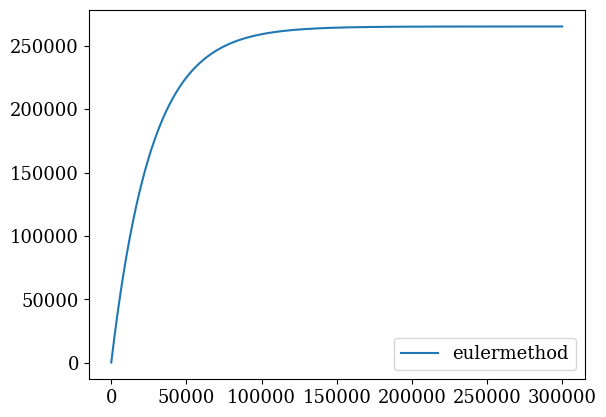

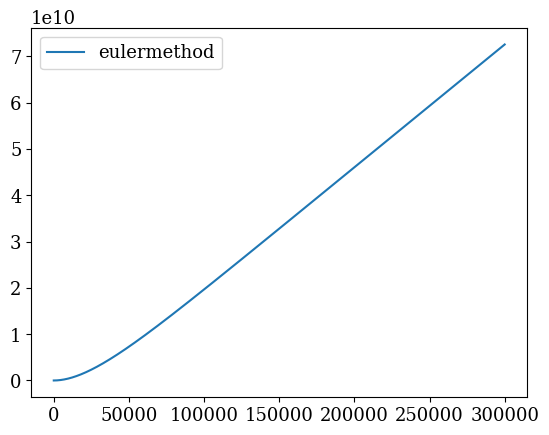

In [41]:
mu=2e-5
m=1
r=0.1
g=10

def eulersolver(x,t,dt,f):
    x_new=x+dt*f(x,t)
    return x_new

def free_fall(dt,tf):
    Vz0=0
    Vz=Vz0
    Z0=1000
    Z=Z0
    Vzlist=[]
    tlist=[]
    Zlist=[]
    for t in np.arange(0,tf,dt):
        Z,Vz = eulersolver(np.array([Z,Vz]),t, dt, deriv_free_fall )
        Vzlist.append(abs(Vz))
        Zlist.append(Z)
        tlist.append(t)
    return tlist,Vzlist, Zlist
tlist2,Vzlist2,Zlist=free_fall(10,300000)
plt.plot(tlist2,Vzlist2, label="eulermethod")
plt.legend()
plt.show()

plt.plot(tlist2,Zlist, label="eulermethod")
plt.legend()
plt.show()


What is the terminal velocity $V_T$ ? 

In [46]:
#if the following cell does not run, then set t = 1, it'll not run, but now, set t= 0 again, it'll run now!
t=0

while ( Vzlist2[t]-Vzlist2[t-1] ) > 0.000001:
    Vt = Vzlist2[t]
    t  = t+1

print("the terminal velocity is ", Vt ,"m/s")


the terminal velocity is  265254.9951804535 m/s


Physically speaking the terminal velocity is when the acceleration of the particle vanishes so we solve this equation $$\frac{dV_Z}{dt}=-\frac{6\pi \mu r }{m} \frac{dZ}{dt}+g $$
for $\frac{dV_Z}{dt}$=0 to get Vt=265258.238486 m/s which is almost the same answer we got numericly

What is the coupling timescale $\tau$ (time necessary for the particle to reach 1/2 of $V_T$)

In [47]:
t=0
Vh=0
while Vh<0.5*Vt:
    Vh=Vzlist2[t]
    t=t+1
taw=t
print("the coupling time scale",taw,"s")


the coupling time scale 1839 s


Now try to integrate the motion with dt=0.5 $\tau$  ? What happen ?

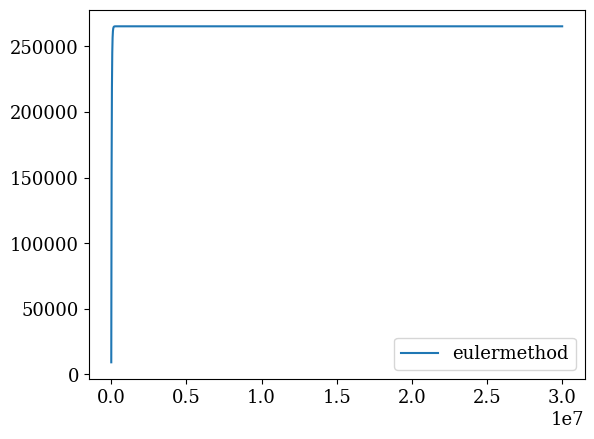

In [48]:
tlist3,Vzlist3, Zlist3=free_fall(0.5*taw,30000000)
plt.plot(tlist3,Vzlist3, label="eulermethod")
plt.legend()


the programm does not work because dt is so big

In order to cure that problem, we want to switch to an IMPLICIT EULER METHOD (1st order).
Write the Euler implicit numerical scheme  ($U_{n+1}=$ a function of $U_{n+1}$ and $U_n$)

$$Z_{n+1}=Z_n +dtV_{z(n+1)}$$
$$V_{z(n+1)}=V_{zn}+dt(-\frac{6\pi \mu r }{m}V_{z(n+1)}-g)  $$

By solving analytically the above equation, derive an equation allowing to compute $U_{n+1}$ as a function of $U_n$

$$V_{z(n+1)}=\frac{V_{zn}-gdt}{1+dt\frac{6\pi \mu r }{m}}  $$
$$Z_{n+1}=Z{n}+\frac{dtV_{zn}-gdt^2}{1+dt\frac{6\pi \mu r }{m}}$$

Write a code that solve implicitely the motion of the particle in the viscous fluid.

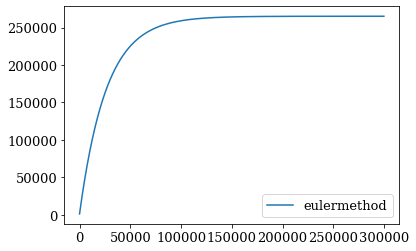

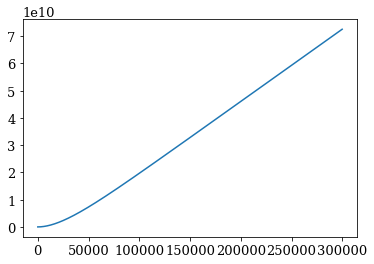

In [42]:
def implicit(dt,tf):
    Vz=0
    Z=1000
    Vzlist=[]
    tlist=[]
    Zlist = []
    for t in np.arange(0,tf,dt):
        Vzn = (Vz+g*dt)/(1+dt*((6*np.pi*mu*r)/m))
        Zn = Z + dt*Vzn
        Z = Zn
        Vz = Vzn
        Vzlist.append(Vz)
        Zlist.append(Z)
        tlist.append(t)
    return tlist,Vzlist, Zlist
tlist2,Vzlist2, Zlist2=free_fall(100,300000)
plt.plot(tlist2,Vzlist2, label="eulermethod")
plt.legend()                  
plt.show()

plt.plot(tlist2,Zlist2, label="eulermethod")
plt.show()


Try different timesteps from 0.1$\tau$ to 2$\tau$ ? Does the integration breaks even for big timestep ?


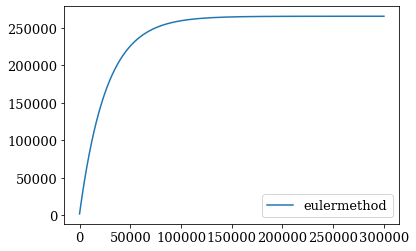

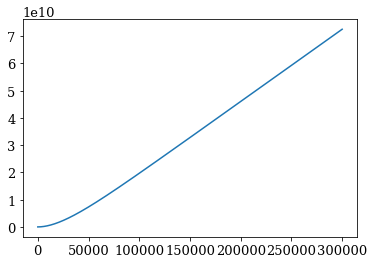

In [41]:
tlist2,Vzlist2, Zlist2=free_fall(0.1*taw,300000)
plt.plot(tlist2,Vzlist2, label="eulermethod")
plt.legend()                  
plt.show()

plt.plot(tlist2,Zlist2, label="eulermethod")
plt.show()


even for a high dt it does not break!!

THIS IS THE MAGIC OF IMPLICIT SOLVERS !